In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [ ]:
# Loading the dataset
df_actual = pd.read_csv("heart_disease_uci.csv")

# First few rows
df_actual.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Shape
df_actual.shape

(920, 16)

In [ ]:
# Summary
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#  Statistical Description
df_actual.describe()

In [ ]:
df_actual.describe(include = "object")

In [ ]:
# Checking for null values
df_actual.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numerical_columns = df_actual.select_dtypes(include=["int64","float64"]).columns
categorical_columns = df_actual.select_dtypes(include=["object"]).columns

print(f"Numerical Columns: {numerical_columns}\nCategorical Columns: {categorical_columns}")

Numerical Columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Categorical Columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


in numerical columns we will impude with median and in categorical columns we will impude with mode

In [ ]:
# Make a working copy
df = df_actual.copy(deep=True)

In [ ]:
# Imputation of null values
for col in numerical_columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

df.isna().sum()

/tmp/ipython-input-3246605205.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode)


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


- We have successfully imputed the null values. The dataset is now clean.
- But now, we will have to replace every value greater than 1 with 1, as we want to predict whether one has heart disease or not(0 - Doesn't have heart disease and 1 - Has heart disease)

In [ ]:
df["num"] = df["num"].clip(upper=1)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## EDA

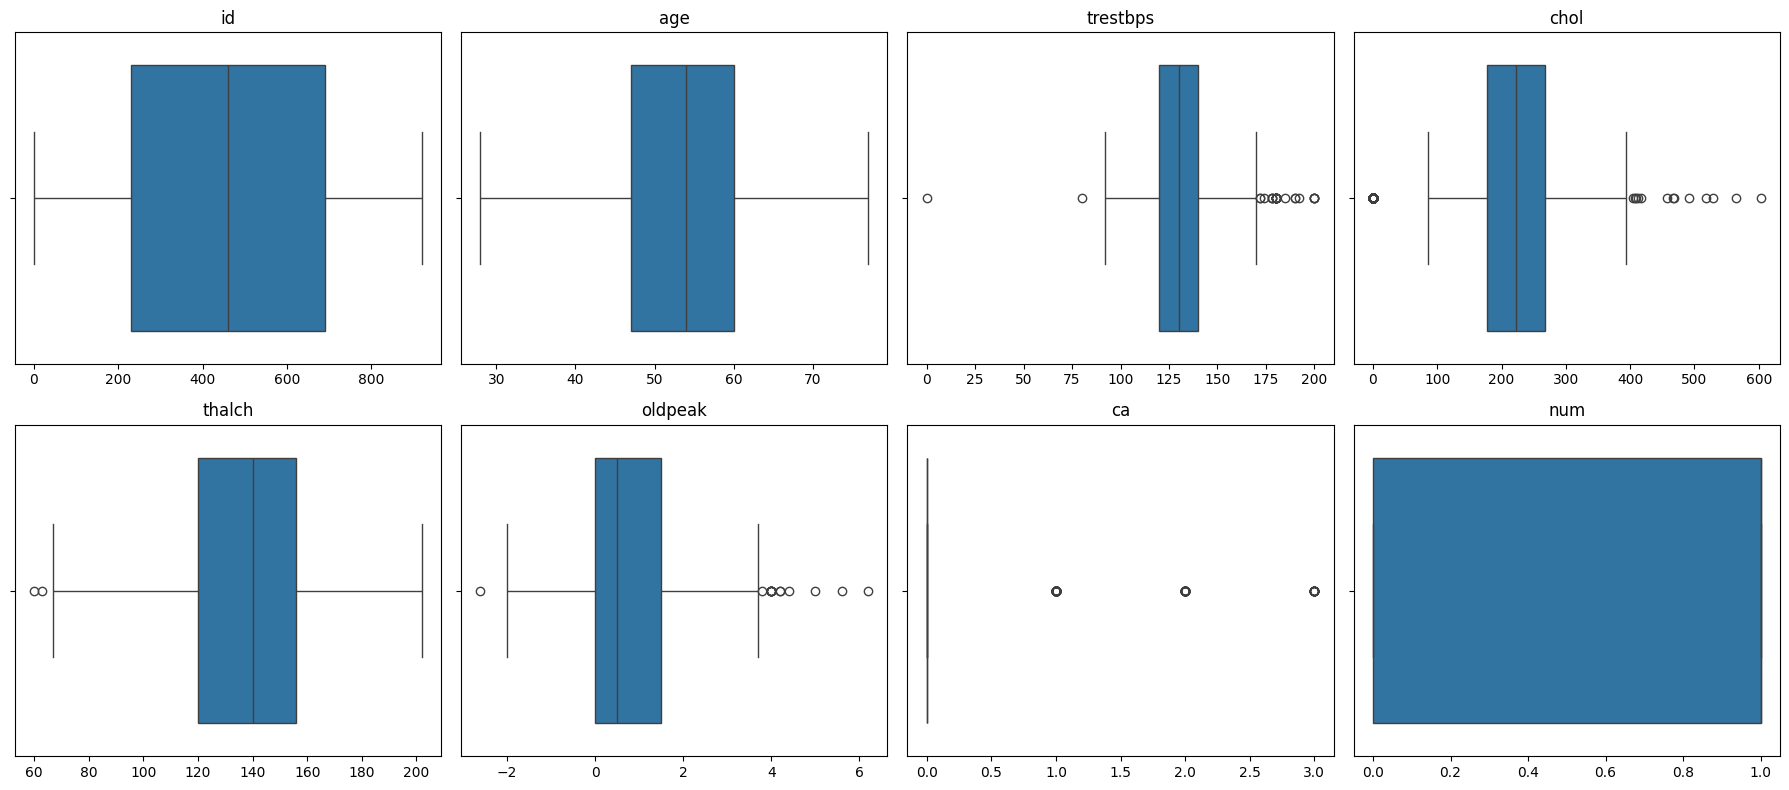

In [ ]:
num_features = len(numerical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

# Box Plot
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

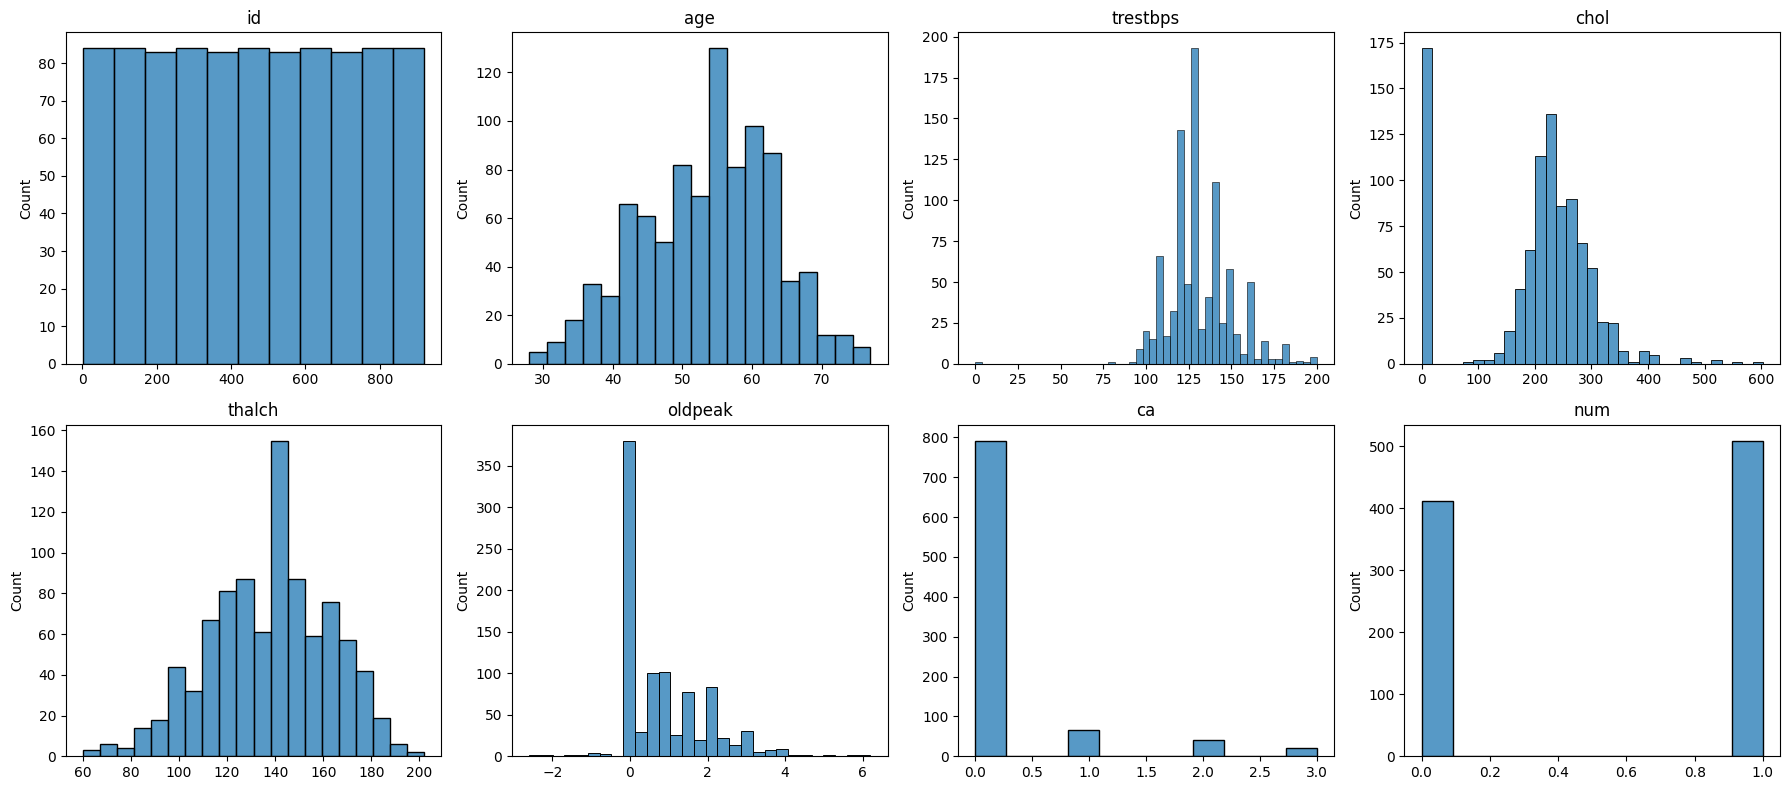

In [ ]:
plt.figure(figsize=(18, 4 * rows))

# Histogram
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.histplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Categorical features

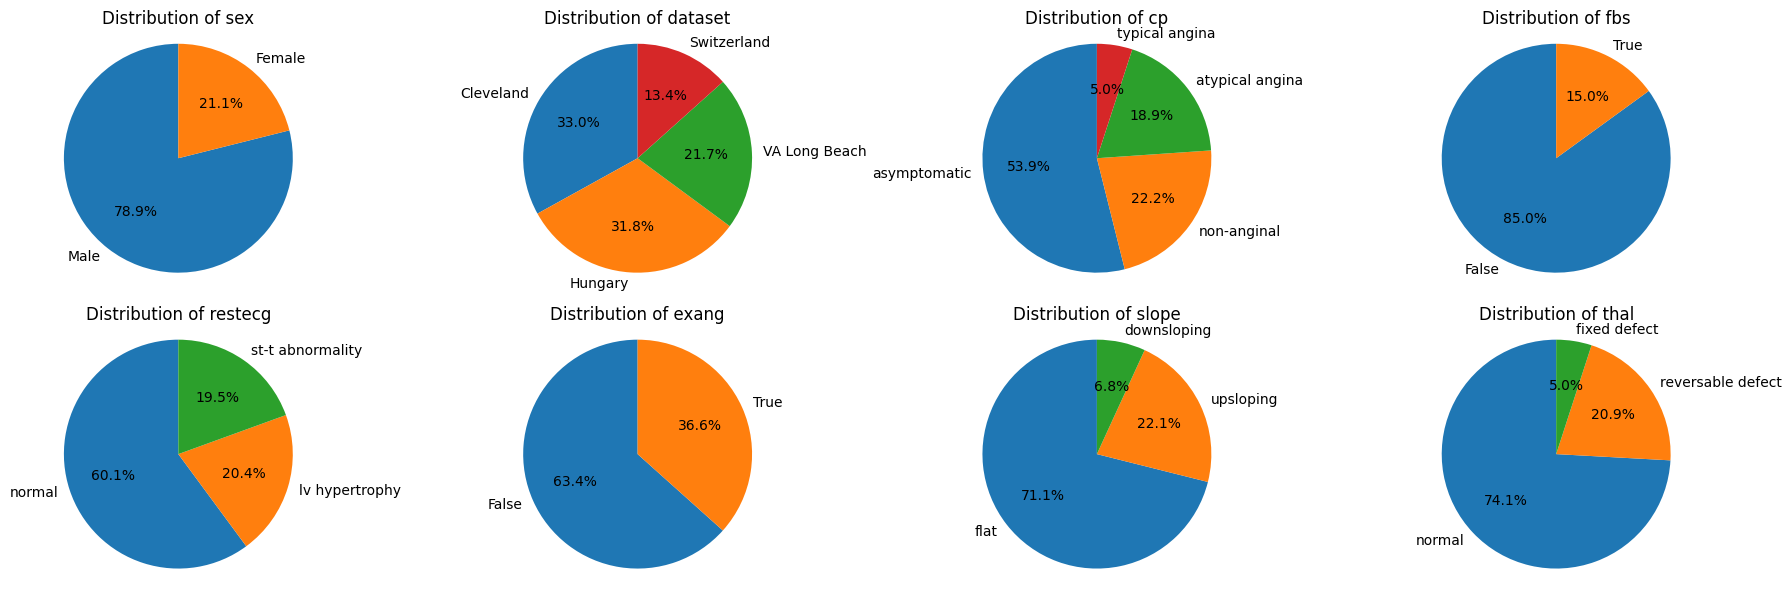

In [ ]:
# Pie plot
num_features = len(categorical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 3 * rows))

for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, idx)

    counts = df[col].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)

    plt.title(f"Distribution of {col}")
    plt.axis("equal")

# turn off empty subplots
for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Target variable analysis

In [ ]:
df["num"].value_counts()

,count
num,
1,509
0,411


## Data Preprocessing

In [ ]:
#Handling the outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

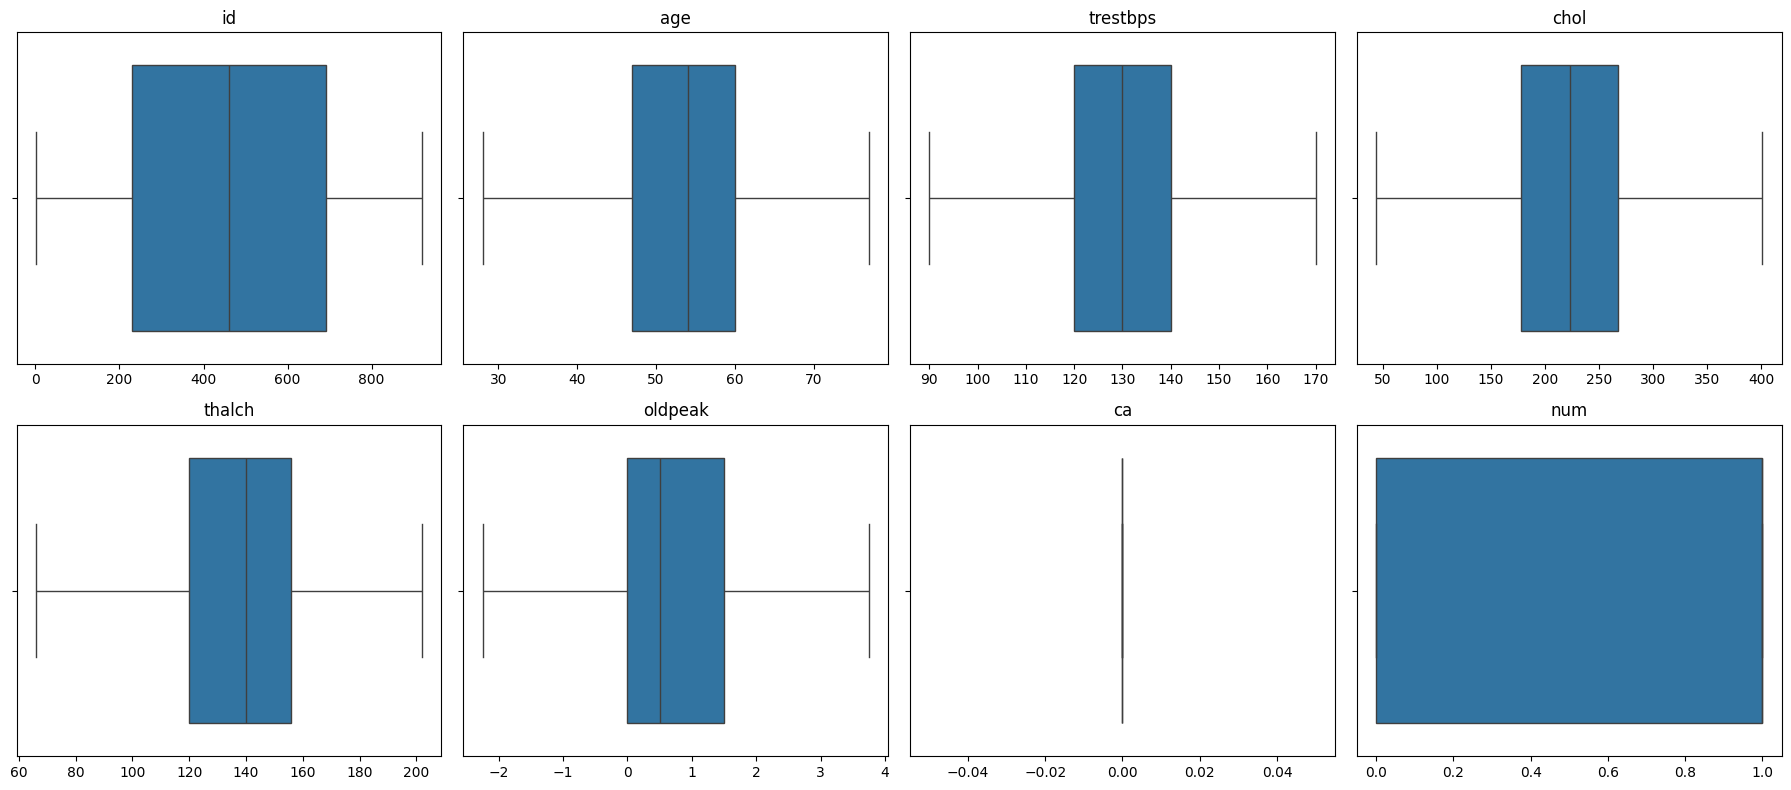

In [ ]:
num_features = len(numerical_columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis("off")

plt.tight_layout()
plt.show()

convert categorical features to numerical features using label encoder

In [ ]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,0.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,0.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


## Feature selection

<Axes: >

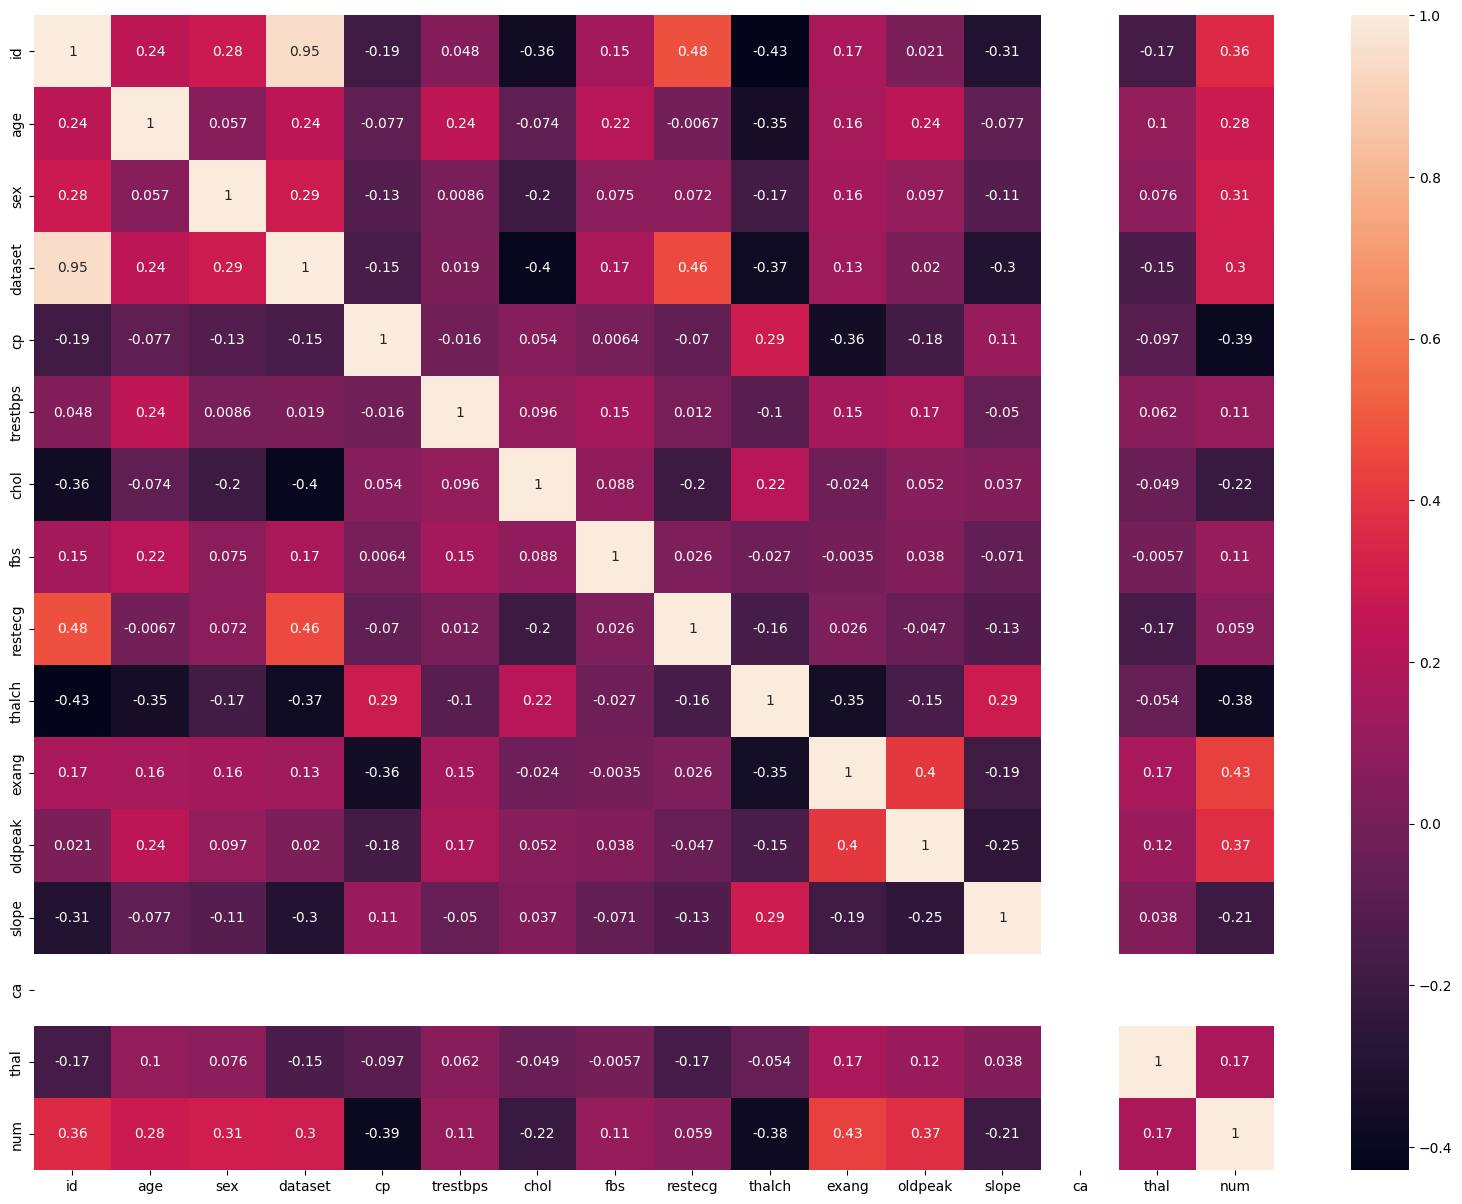

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Dropping irrelavant columns
col_to_drop = ["id", "ca", "thal"]
df = df.drop(columns=col_to_drop, axis=1)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0


## Splitting the data

In [ ]:
X = df.drop("num", axis = 1)
y = df["num"]

print(f"X Shape: {X.shape}\ny Shape: {y.shape}")

X Shape: (920, 12)
y Shape: (920,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(
    f"X_train Shape; {X_train.shape}\ny_train Shape: {y_train.shape}\nX_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}"
)

X_train Shape; (690, 12)
y_train Shape: (690,)
X_test Shape: (230, 12)
y_test Shape: (230,)


In [ ]:
# Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print(
    f"X_train_sc Shape; {X_train_sc.shape}\nX_test_sc Shape: {X_test_sc.shape}"
)

X_train_sc Shape; (690, 12)
X_test_sc Shape: (230, 12)


## Model Training

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train_data = dt.predict(X_train_sc)
print(f"y_pred_train_data Shape: {y_pred_train_data.shape}")

y_pred_test_data = dt.predict(X_test_sc)
print(f"y_pred_test_data Shape: {y_pred_test_data.shape}")

y_pred_train_data Shape: (690,)
y_pred_test_data Shape: (230,)


In [ ]:
print(classification_report(y_train, y_pred_train_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       375

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690



In [ ]:
print(classification_report(y_test, y_pred_test_data))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        96
           1       0.80      0.73      0.77       134

    accuracy                           0.74       230
   macro avg       0.73      0.74      0.74       230
weighted avg       0.75      0.74      0.74       230



The Decision Tree classifier achieved perfect accuracy on the training set (1.00) but showed significantly lower performance on the test set (0.73). This large gap indicates that the model is overfitting and does not generalize well to unseen data. The overfitting occurs because the tree grows too deep, causing it to capture noise and overly specific patterns in the training data.


## Hyperparamter Tuning

In [ ]:
param_grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "max_features": [None, "sqrt", "log2"],
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(grid_search.best_score_)

Best Parameters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Best Cross-Validation Accuracy:
0.8


In [ ]:
best_dt = grid_search.best_estimator_

y_pred_test = best_dt.predict(X_test_sc)

In [ ]:
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        96
           1       0.87      0.77      0.81       134

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.81      0.80      0.80       230

Confusion Matrix:
[[ 80  16]
 [ 31 103]]


After hyperparameter tuning, the Decision Tree classifier demonstrated better generalization performance. The test accuracy improved from around 73% to 80%, and the difference between training and test performance was reduced. This shows that overfitting was effectively reduced by limiting model complexity using hyperparameters such as maximum depth and minimum samples per leaf.


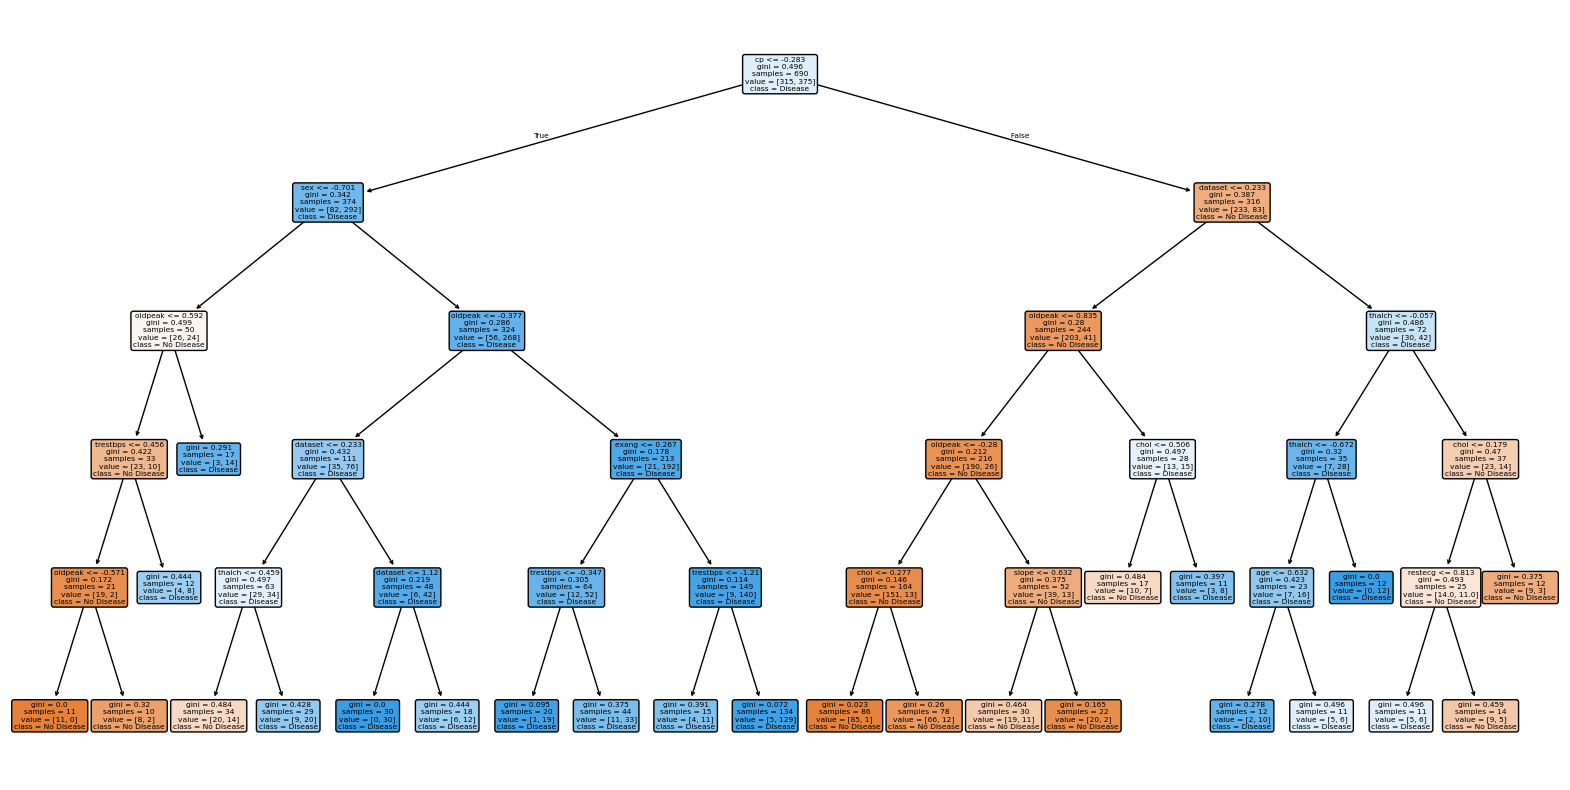

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
)
plt.show()

## Conclusion

In this project, a Decision Tree Classifier was built to predict heart disease. First, the dataset was explored to find missing values and outliers. Missing values were filled using the median for numbers and the mode for categories. Outliers were handled using the IQR method. Categorical features were changed into numbers with Label Encoding, and features like id, ca, and thal were removed after checking correlations. The data was then split into training and testing sets, and numerical features were scaled.

The first model showed overfitting, with high accuracy on training data but lower accuracy on test data. To fix this, hyperparameter tuning was done using GridSearchCV. This improved the test accuracy from about 73% to 80% and reduced overfitting. The final model works better on new data and gives more reliable results.
